In [ ]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [ ]:
data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.shape

(200, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.describe(include="object")#ONLY DESCRIBE THE ROWS WITH NON INTEGER VALUES

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [ ]:
print(data['Sex'].value_counts(),"\n")
print(data['BP'].value_counts(),"\n")
print(data['Cholesterol'].value_counts(),"\n")
print(data['Drug'].value_counts(),"\n")

Sex
M    104
F     96
Name: count, dtype: int64 

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 



**DATA VISUALIZATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-51cc13790d03>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug',data=data,width=0.3,palette='crest')


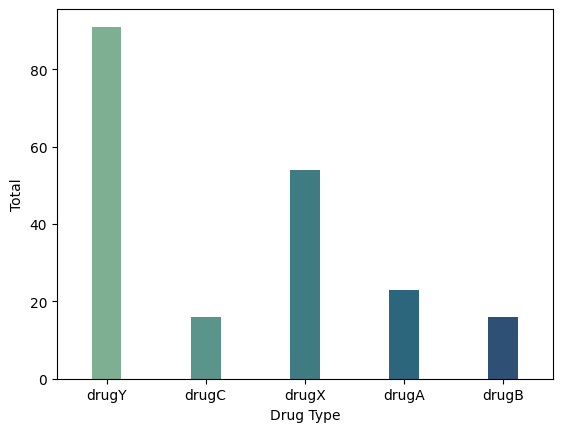

In [ ]:
sns.countplot(x='Drug',data=data,width=0.3,palette='crest')
plt.ylabel('Total')
plt.xlabel('Drug Type')
plt.show()

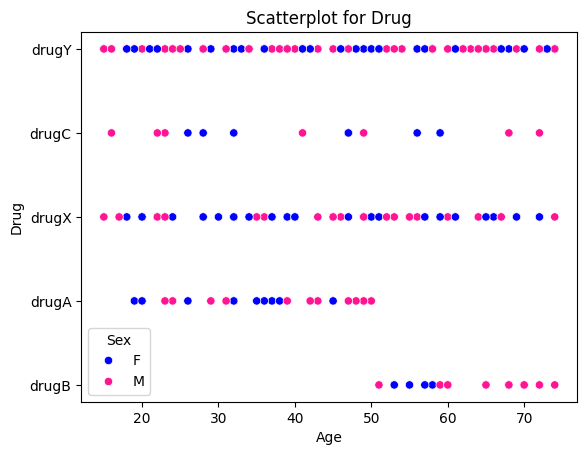

In [ ]:
sns.scatterplot(y='Drug',x='Age',data=data,hue='Sex',palette=["blue","deeppink"])
plt.title("Scatterplot for Drug")
plt.show()

**TRANSFORMATION OF DATA**

In [ ]:
X= data[['Age',	'Sex',	'BP',	'Cholesterol',	'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
from sklearn import preprocessing
t_sex = preprocessing.LabelEncoder()
t_sex.fit(['F','M'])
X[:,1] = t_sex.fit_transform(X[:,1])

t_BP = preprocessing.LabelEncoder()
t_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = t_BP.fit_transform(X[:,2])

t_Chol = preprocessing.LabelEncoder()
t_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = t_Chol.fit_transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
y= data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


In [ ]:
drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Prediction**

In [ ]:
predTree= drugTree.predict(X_test)
print(predTree[0:5],"\n")
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX'] 

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [ ]:
from sklearn import metrics
print("accuracy is :",metrics.accuracy_score(y_test,predTree))

accuracy is : 0.9833333333333333


**VISUALIZATION**

In [ ]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
!dot -Tpng tree.dot -o tree.png